In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# importing data
data = pd.read_csv('../data/Diabetes_Data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Understanding the correlation between features and Outcome

In [ ]:
feature_columns = [col for col in data.columns if col != "Outcome"]

for feature in feature_columns:
    correlation = data[feature].corr(data['Outcome'])
    print(f'Correlation for {feature} = {correlation}')

Correlation for Pregnancies = 0.2218981530339867
Correlation for Glucose = 0.4665813983068738
Correlation for BloodPressure = 0.0650683595503328
Correlation for SkinThickness = 0.07475223191831938
Correlation for Insulin = 0.13054795488404786
Correlation for BMI = 0.2926946626444453
Correlation for DiabetesPedigreeFunction = 0.17384406565295996
Correlation for Age = 0.23835598302719752


<Axes: >

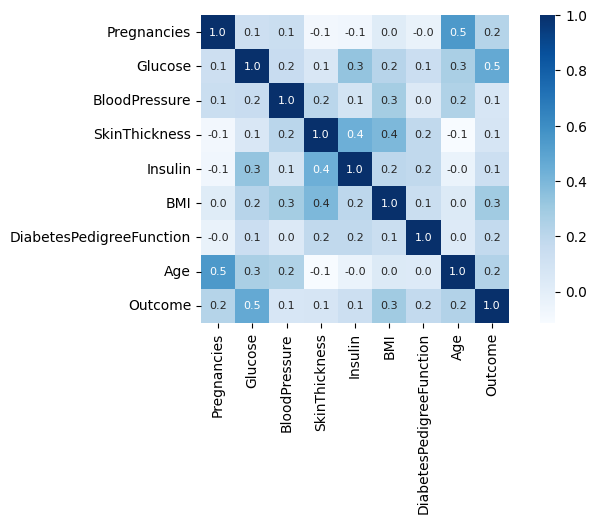

In [11]:
corr = data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, 
            annot_kws={'size':8}, cmap='Blues')

### Logistic Regression Model

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
X = data[['Glucose', 'BMI', 'Age', 'Pregnancies']]
y = data['Outcome']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', conf_matrix)

report = classification_report(y_test, y_pred)
print('\nClassification report:\n', report)

Model Accuracy: 0.7532467532467533

Confusion Matrix:
 [[81 18]
 [20 35]]

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



##### Summary
- The accuracy of the model is 75% which means that the model predicts whether a patient has diabetes or not in 75% of cases
- Precision for the non-diabetic class (0) is 0.80, meaning that among all patients predicted as non-diabetic, 80% were actually non-diabetic. This indicates the model's reliability in correctly identifying non-diabetic individuals.
- Precision for the diabetic class (1) is 0.66, meaning that among all patients predicted as diabetic, 66% actually had diabetes. This shows that about a third of the patients predicted as diabetic do not actually have diabetes, suggesting some over-prediction for diabetes cases.